In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Car Name,Price,Fuel Type,KM Driven
0,2021 Toyota Camry HYBRID,₹30.75 lakh,Hybrid,39.75k km
1,2015 Toyota Etios G,₹2.56 lakh,Petrol,34.53k km
2,2017 Toyota Corolla Altis G CVT PETROL,₹6.40 lakh,Petrol,26.93k km
3,2021 Toyota URBAN CRUISER PREMIUM GRADE AT,₹7.20 lakh,Petrol,52.14k km
4,2018 Toyota YARIS V CVT,₹5.11 lakh,Petrol,62.36k km


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car Name   20 non-null     object
 1   Price      20 non-null     object
 2   Fuel Type  20 non-null     object
 3   KM Driven  20 non-null     object
dtypes: object(4)
memory usage: 772.0+ bytes


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Bar Chart – Average Price by Fuel Type

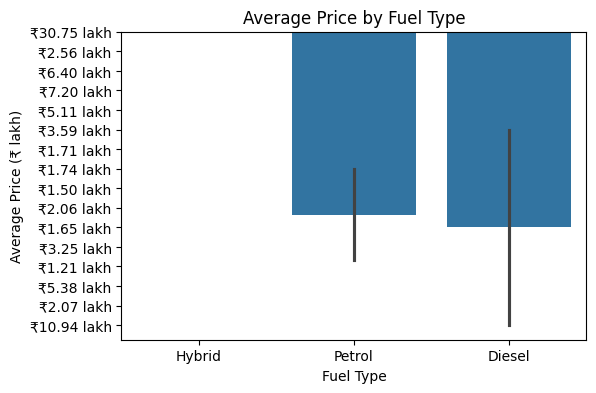

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x='Fuel Type', y='Price', data=df, estimator='mean')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price (₹ lakh)')
plt.show()

Scatter Plot – KM Driven vs Price

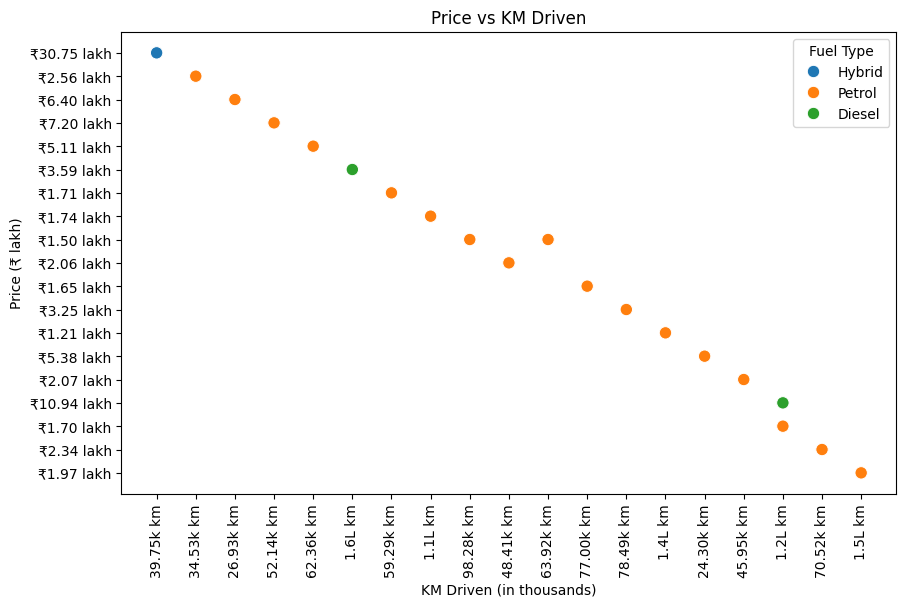

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='KM Driven', y='Price', hue='Fuel Type', data=df, s=80)
plt.title('Price vs KM Driven')
plt.xlabel('KM Driven (in thousands)')
plt.xticks(rotation=90) 
plt.ylabel('Price (₹ lakh)')
plt.show()

Pie Chart – Distribution of Fuel Types

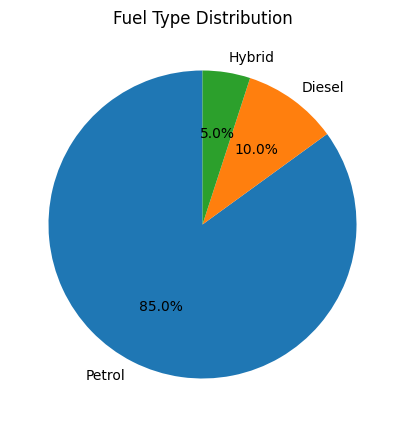

In [18]:
plt.figure(figsize=(5,5))
df['Fuel Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.show()

In [20]:
df['Year'] = df['Car Name'].str.extract(r'(\d{4})')

In [31]:
df.head()

,Car Name,Price,Fuel Type,KM Driven,Year
0,2021 Toyota Camry HYBRID,₹30.75 lakh,Hybrid,39.75k km,2021
1,2015 Toyota Etios G,₹2.56 lakh,Petrol,34.53k km,2015
2,2017 Toyota Corolla Altis G CVT PETROL,₹6.40 lakh,Petrol,26.93k km,2017
3,2021 Toyota URBAN CRUISER PREMIUM GRADE AT,₹7.20 lakh,Petrol,52.14k km,2021
4,2018 Toyota YARIS V CVT,₹5.11 lakh,Petrol,62.36k km,2018


In [22]:
df['Year'] = pd.to_numeric(df['Year'])

Bar Chart – Number of Cars by Manufacturing Year

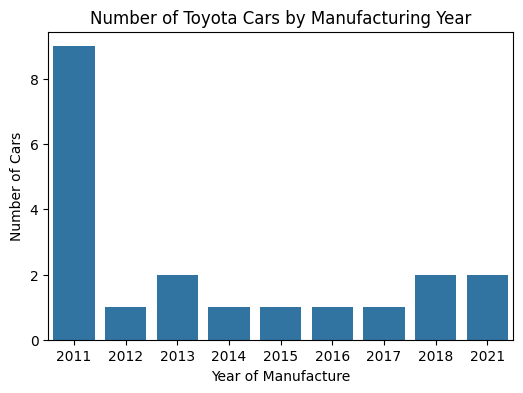

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Year', data=df, order=sorted(df['Year'].dropna().unique()))
plt.title('Number of Toyota Cars by Manufacturing Year')
plt.xlabel('Year of Manufacture')
plt.ylabel('Number of Cars')
plt.show()

Horizontal Bar Chart – Price vs KM Driven (by Car Name)

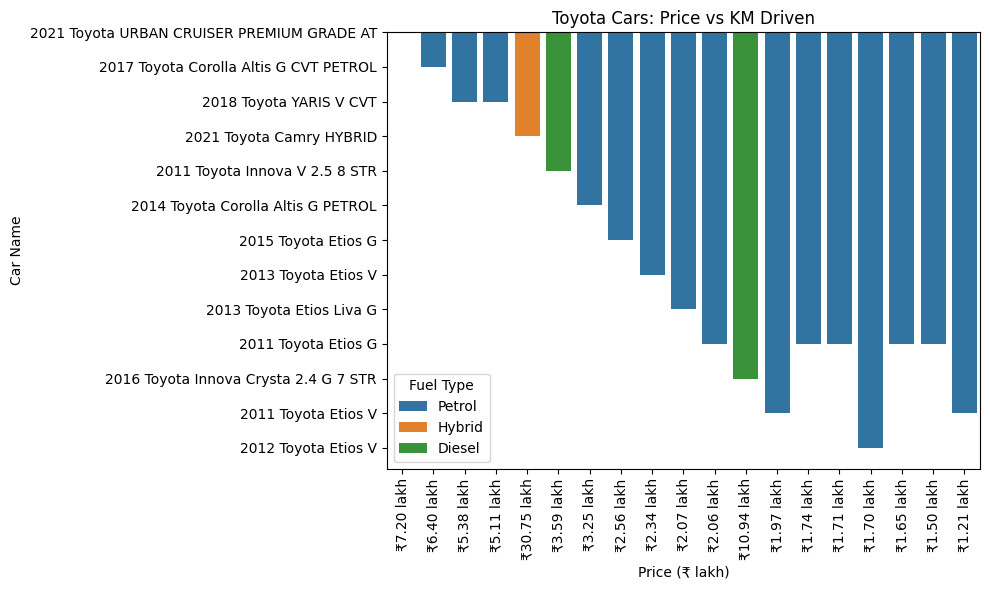

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Price',
    y='Car Name',
    data=df.sort_values('Price', ascending=False),
    hue='Fuel Type'
)
plt.title('Toyota Cars: Price vs KM Driven')
plt.xlabel('Price (₹ lakh)')
plt.xticks(rotation=90) 
plt.ylabel('Car Name')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

In [33]:
df['Price'] = (
    df['Price']
    .str.replace('₹', '', regex=False)
    .str.replace('lakh', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)

In [35]:
def clean_km(value):
    if isinstance(value, str):
        value = value.lower().replace('km', '').replace(',', '').strip()
        if 'l' in value:  # lakh km
            return float(value.replace('l', '')) * 100000
        elif 'k' in value:  # thousand km
            return float(value.replace('k', '')) * 1000
        else:
            return float(value)
    return np.nan

df['KM Driven'] = df['KM Driven'].apply(clean_km)

In [36]:
df.head()

,Car Name,Price,Fuel Type,KM Driven,Year
0,2021 Toyota Camry HYBRID,30.75,Hybrid,39750.0,2021
1,2015 Toyota Etios G,2.56,Petrol,34530.0,2015
2,2017 Toyota Corolla Altis G CVT PETROL,6.40,Petrol,26930.0,2017
3,2021 Toyota URBAN CRUISER PREMIUM GRADE AT,7.20,Petrol,52140.0,2021
4,2018 Toyota YARIS V CVT,5.11,Petrol,62360.0,2018


Correlation Heatmap

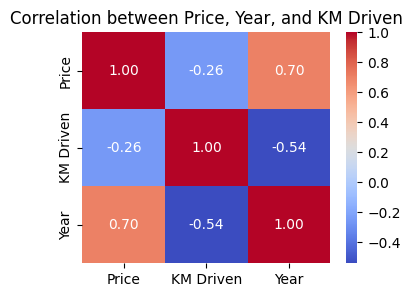

In [37]:
plt.figure(figsize=(4,3))
sns.heatmap(df[['Price','KM Driven','Year']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Price, Year, and KM Driven')
plt.show()